<a href="https://colab.research.google.com/github/esolberg21/stats306-winter2021/blob/main/EPSmidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATS 306, Winter 2021
## Take-home Midterm Exam

Assigned: March 8, 2021  
Due: March 11, 2021 (canvas will accept uploads until 3 am EST on March 12)

There are a total of **four problems** for a total of **30 points** (problems are worth similar but not exactly the same number of points)

**PLEASE READ EXAM INSTRUCTIONS** (available [here](https://github.com/ambujtewari/stats306-winter2021/blob/main/midterm/README.md)) before proceeding further.

Links to jump directly to problems:

- [Problem 1](#Problem-1): CO2 emissions
- [Problem 2](#Problem-2): Global population
- [Problem 3](#Problem-3): Happiness score
- [Problem 4](#Problem-4): Reversal paradox

### Required Packages

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Statement of Academic Integrity

**(1)**  

_"I have read the exam instructions. All work submitted is my own. If I used any resources, physical, digital, or otherwise, I have listed them below. I have fully complied with all standards of academic integrity."_  

Type your full name below in lieu of a physical signature.

#### Text solution cell 0.1

Eric Solberg


**(2)** List any resources you used that are not mentioned in the exam instructions

#### Text solution cell 0.2
NA

### Problem 1

#### CO2 emissions (tonnes per person), _7 points_

In [138]:
# DO NOT EDIT THIS CELL

# read in data and pivot
CO2_df <- read_csv('https://raw.githubusercontent.com/ambujtewari/stats306-winter2021/main/data/co2_emissions_tonnes_per_person.csv')
CO2_df <- pivot_longer(CO2_df, `1800`:`2018`, names_to="year", values_to="emissions")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.




**(1)** Using `CO2_df` as a starting point, create a tibble `missing_emissions` with exactly two columms: `year` and `num_missing`. For each value of `year`, the `num_missing` column should be the number of countries whose CO2 emissions data is missing in `CO2_df`. Please make sure to also display the tibble after you create it. _**2 points**_

In [139]:
missing_emissions = 
CO2_df %>% 
group_by(year) %>% 
summarize(num_missing = sum(is.na(emissions)))
missing_emissions

,year,num_missing
,<chr>,<int>
1,1800,187
2,1801,187
3,1802,185
4,1803,187
5,1804,186
6,1805,187
7,1806,187
8,1807,186
9,1808,187


**(2)** For which years do we have CO2 emissions data for all countries? First write the code to get the answer and then write the answer in the text cell below. _**2 points**_

In [140]:
CO2_df %>% 
group_by(year) %>% 
summarize(num_missing = sum(is.na(emissions))) %>% filter(num_missing == 0)

year,num_missing
<chr>,<int>
2002,0
2003,0
2004,0
2005,0
2006,0
2007,0
2008,0
2009,0
2010,0


#### Text solution cell 1.2

From the years 2002 through 2018, we have CO2 emissions for every country. 

**(3)** Let us call the years you found out in the previous part "GOOD YEARS". For all GOOD YEARS, using `CO2_df`, create a scatter plot of `emissions` (y-axis) vs `years` (x-axis) for the three countries: `United States`, `China` and `India`. Make sure each country's data gets plotted in a different color. Additionally, superimpose 3 smooth curves on the scatterplot, one smooth curve for each of the three countries. The smooth curves' colors should match the points' colors. _**3 points**_

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



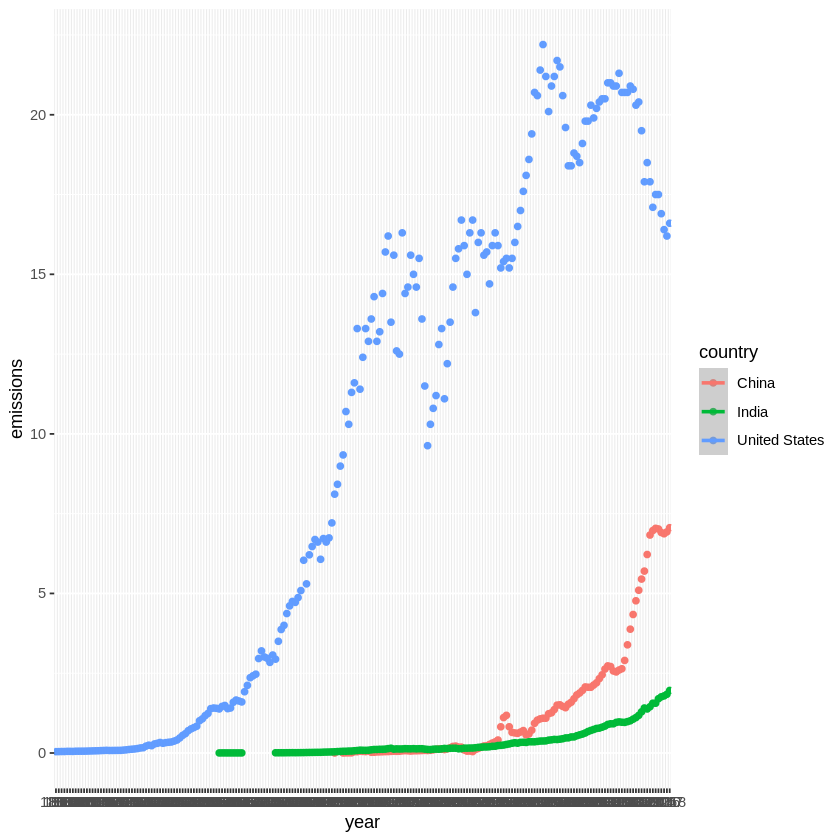

In [142]:
GOOD_YEARS = CO2_df %>%
filter(country == "United States" | country == "China" | country == "India", !is.na(emissions)) %>%
ggplot(mapping= aes(x = year, y = emissions, color = country)) +
geom_point() + 
geom_smooth()
GOOD_YEARS

### Problem 2

#### Global population, _7 points_

In [135]:
# DO NOT EDIT THIS CELL

# read in data and pivot
pop_df <- read_csv('https://raw.githubusercontent.com/ambujtewari/stats306-winter2021/main/data/population_total.csv')
pop_df <- pivot_longer(pop_df, `1800`:`2100`, names_to="year", values_to="population") %>%
    mutate(year = as.integer(year))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.




**(1)** Using `pop_df` as a starting point, create a tibble with two columns: `year` and `total_pop` where the latter should be the sum of the populations of all countries in a given year. Make sure that `total_pop` has the world population in **billions**. Use this tibble to create a scatter plot of `total_pop` (y-axis) vs. `year` (x-axis). For full credit, write a solution using pipes that does not use any intermediate variables. _**3 points**_

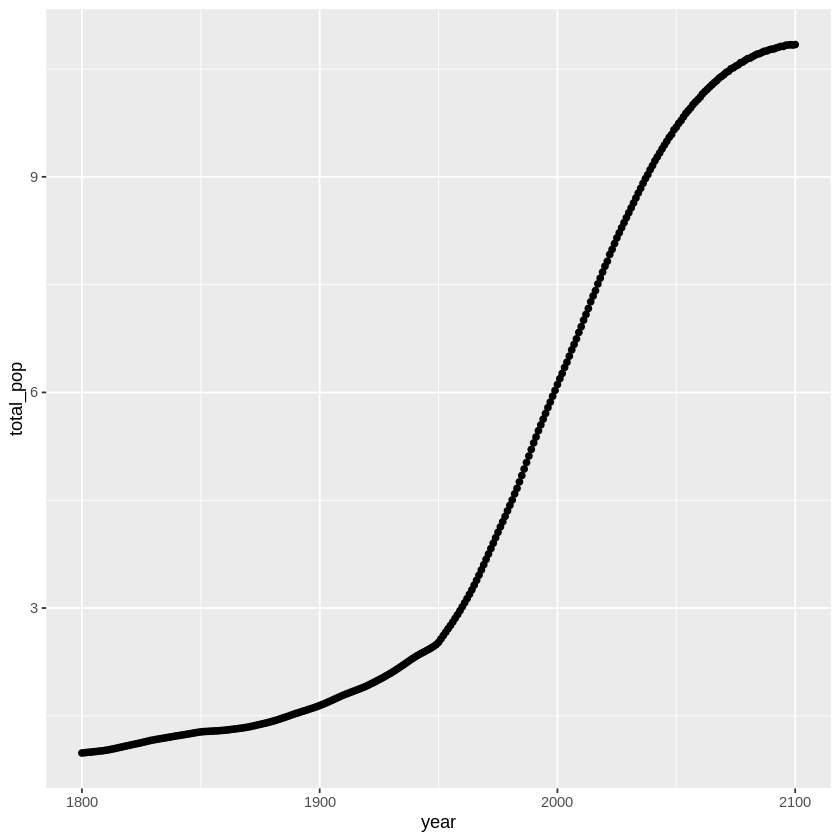

In [72]:
pop_df %>% 
group_by(year) %>%
summarize(total_pop = sum(population)/1000000000) %>%
ggplot()+ 
geom_point(mapping = aes(x = year, y =total_pop))

**(2)** Let us define a vector with countries that are often refered to as the "Group of Seven".

In [76]:
# DON"T EDIT THIS CELL

G7 = c("Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States")

Use the `G7` variable above to create a bar chart with these countries on the y-axis and populations of these countries in the year 2000 on the x-axis. Make sure each country's bar is colored with a different color. Use a single command with pipes to do this. _**2 points**_

ERROR while rich displaying an object: Error: stat_count() can only have an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

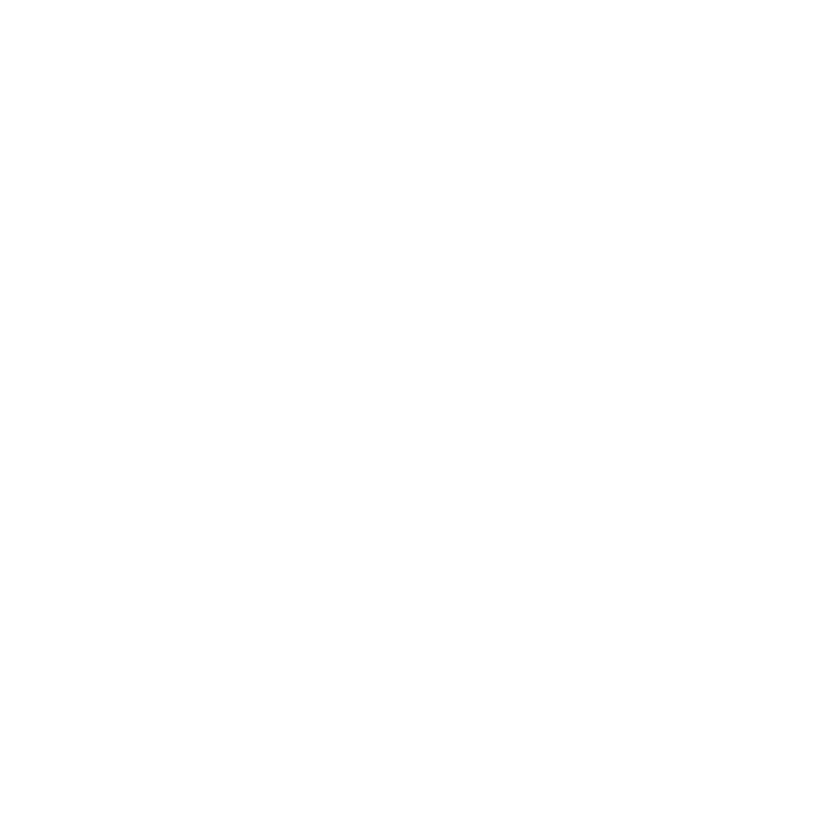

In [88]:
pop_df %>% 
filter(country == G7, year == 2000) %>%
ggplot() +
geom_bar(mapping=aes(country, population))

**(3)** Use `geom_line` to plot the populations of the countries in `G7` over time. Make sure `year` is on the x-axis, `population` is on the y-axis and the lines corresponding to different countries are in different colors. _**2 points**_ 

_Note:_ Population figures for future years are based on projections.

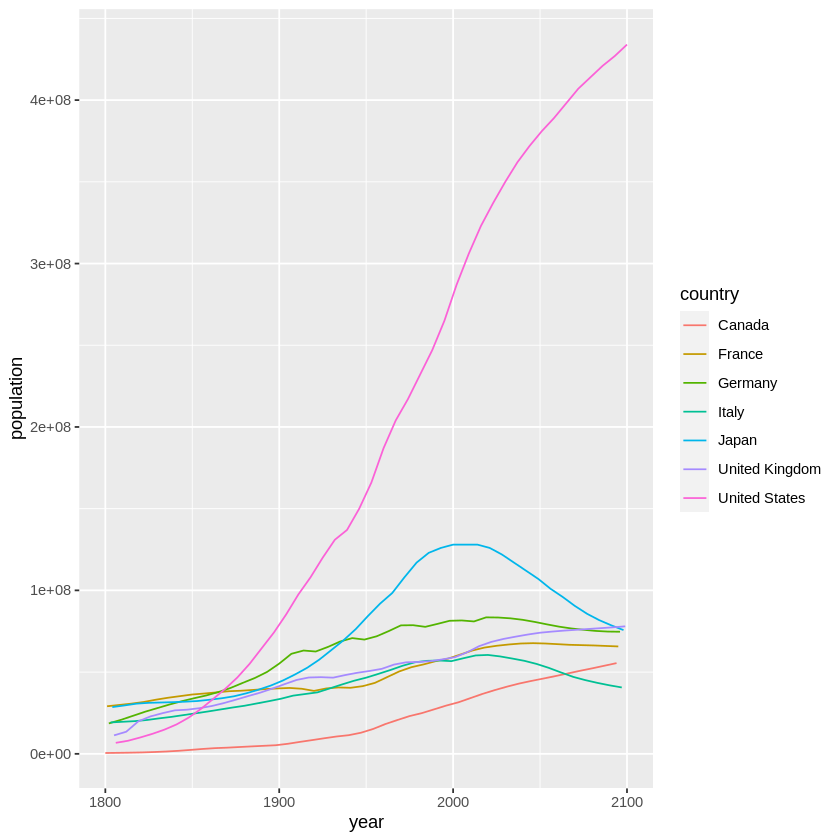

In [82]:
pop_df%>%
filter(country == G7) %>%
ggplot() +
geom_line(mapping=aes(year, population, color = country))

### Problem 3

#### Happiness score, _8 points_

In [150]:
# DO NOT EDIT THIS CELL

# read in data
happy_df <- read_csv("https://raw.githubusercontent.com/ambujtewari/stats306-winter2021/main/data/hapiscore_whr.csv")




── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  `2005` = col_double(),
  `2006` = col_double(),
  `2007` = col_double(),
  `2008` = col_double(),
  `2009` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double(),
  `2018` = col_double(),
  `2019` = col_double()
)




country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,0.372,0.440,0.476,0.383,0.378,0.357,0.313,0.398,0.422,0.266,0.269,0.257
Albania,NA,NA,0.463,NA,0.549,0.527,0.587,0.551,0.455,0.481,0.461,0.451,0.464,0.500,0.488
Algeria,NA,NA,NA,NA,NA,0.546,0.532,0.560,NA,0.635,NA,0.534,0.525,0.504,0.501
Angola,NA,NA,NA,NA,NA,NA,0.559,0.436,0.394,0.379,NA,NA,NA,NA,NA
Argentina,NA,0.631,0.607,0.596,0.642,0.644,0.678,0.647,0.658,0.667,0.670,0.643,0.604,0.579,0.597
Armenia,NA,0.429,0.488,0.465,0.418,0.437,0.426,0.432,0.428,0.445,0.435,0.433,0.429,0.506,0.468
Australia,0.734,NA,0.729,0.725,NA,0.745,0.741,0.720,0.736,0.729,0.731,0.725,0.726,0.718,0.722
Austria,NA,0.712,NA,0.718,NA,0.730,0.747,0.740,0.750,0.695,0.708,0.705,0.729,0.740,0.729
Azerbaijan,NA,0.473,0.457,0.482,0.457,0.422,0.468,0.491,0.548,0.525,0.515,0.530,0.515,0.517,0.516


**(1)** The `happy_df` tibble contains national averages of a "happiness score" for various contries for the years 2005 through 2019. The "happiness score" is the response to the question:

"Think of a ladder, with the best possible life for you being a 10, and the worst possible life being a 0. Rate your own life on this 0 to 10 scale."

In the tibble above, these responses on a 0 to 10 scale have been rescaled to the interval \[0,1\].

In the cell below, write a commmand using pipes to performance the following sequence of operations in the order specified using `happy_df` as a starting point: _**5 points**_

1. keep only the columns corresponding to the years 2018 and 2019
2. keep only those countries for which both 2018 and 2019 data is available
3. create two new columns: `rank_2018` and `rank_2019`. These should be ranks of the country in the years 2018 and 2019 respectively. Use the `rank` function in R (don't worry about tie-breaking options, just use the default) and make sure that counties with *higher* average happiness scores get *smaller* numerical ranks.
4. drop the columns corresponding to the years 2018 and 2019 leaving just three columns: `country`, `rank_2018` and `rank_2019`
5. keep only those countries that had a rank of 10 or better in _both_ 2018 and 2019

Finland is often called the happiest country on earth. In your final result, does it appear with a rank of 1 in both years?

In [144]:
happy_df  %>%
group_by(country)%>%
select("2018", "2019") %>%
na.omit()%>%
#mutate(rank_2018 = rank(2018), rank_2019 = rank(2019)) %>% 
summarize(rank_2018 = rank(2018), rank_2019 = rank(2019))%>%
head(10)

Adding missing grouping variables: `country`



country,rank_2018,rank_2019
<chr>,<dbl>,<dbl>
Afghanistan,1,1
Albania,1,1
Algeria,1,1
Argentina,1,1
Armenia,1,1
Australia,1,1
Austria,1,1
Azerbaijan,1,1
Bangladesh,1,1


#### Text solution cell 3.1

Unfortunately No


**(2)** Before proceeding, let us reshape the data a little bit.

In [145]:
# DO NOT EDIT THIS CELL

happy_df_pivoted <- pivot_longer(happy_df, `2005`:`2019`, names_to="year", values_to="happiness_score")

Now, using `happy_df_pivoted` as the starting point, write a single command using pipes to execute the following steps in order: _**3 points**_

1. consider only the data for the years 2015 through 2019 (inclusive)
2. compute the average happiness score (put it in a column `average_happiness_score`), for the period 2015-2019, but only for those countries that have no missing data during this period
3. sort `average_happiness_score` in descending order and show the top 10 happiest countries for the period 2015-2019

In [146]:
happy_df_pivoted %>% 
group_by(country) %>%
summarise(year, happiness_score) %>% 
filter(year == "2015"| year == "2016"| year == "2017"| year == "2018"| year == "2019" )%>% 
summarize(average_happiness_score = mean(happiness_score))%>% 
na.omit() %>% 
arrange(desc(average_happiness_score)) %>%
head(10)


`summarise()` has grouped output by 'country'. You can override using the `.groups` argument.



country,average_happiness_score
<chr>,<dbl>
Finland,0.7714
Denmark,0.7592
Norway,0.7542
Switzerland,0.7514
Netherlands,0.7446
Sweden,0.7334
New Zealand,0.7330
Canada,0.7294
Australia,0.7244


### Problem 4

#### Reversal paradox, _8 points_

![title](https://upload.wikimedia.org/wikipedia/commons/f/fb/Simpsons_paradox_-_animation.gif)

The **reversal paradox** (also called the **Simpson's paradox**, especially when categorical variables are involved) involves a situation when the overall correlation between a pair of variables, say `X` and `Y`, has one sign (say negative) but when the data is seperated into groups by a third variable `G`, each of the partial correlations (correlations between `X` and `Y` within a group with same value of `G`) have the opposite signs (say positive). See the animation above (courtesy [Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox)) for an example.

In [147]:
# DO NOT EDIT THIS CELL

get_mystery_df <- function(rho,a,b,c,d) {
    n <- 500
    G <- sample(1:5, n, replace=TRUE)
    X <- rnorm(n)
    Y <- rnorm(n)
    rotated <- cbind(X,Y) %*% matrix(c(1,rho,rho,1),nrow=2,ncol=2)
    X <- rotated[,1] + a*G + b
    Y <- rotated[,2] + c*G + d
    return(tibble(X = X, Y = Y, G = factor(G)))
}


df1 <- get_mystery_df(0.7,-0.3,0.3*2.5,0.3,-0.3*2.5)

**(1)** For the mysterious tibble `df1` created above (has 500 rows and three columns `X`, `Y`, and `G`), create a scatterplot of `X` vs `Y` and superimpose the line of best fit on it (the line should be in *red* color). Make sure that just the line of best fit is plotted (i.e., any error bars should be turned off). _**2 points**_

`geom_smooth()` using formula 'y ~ x'



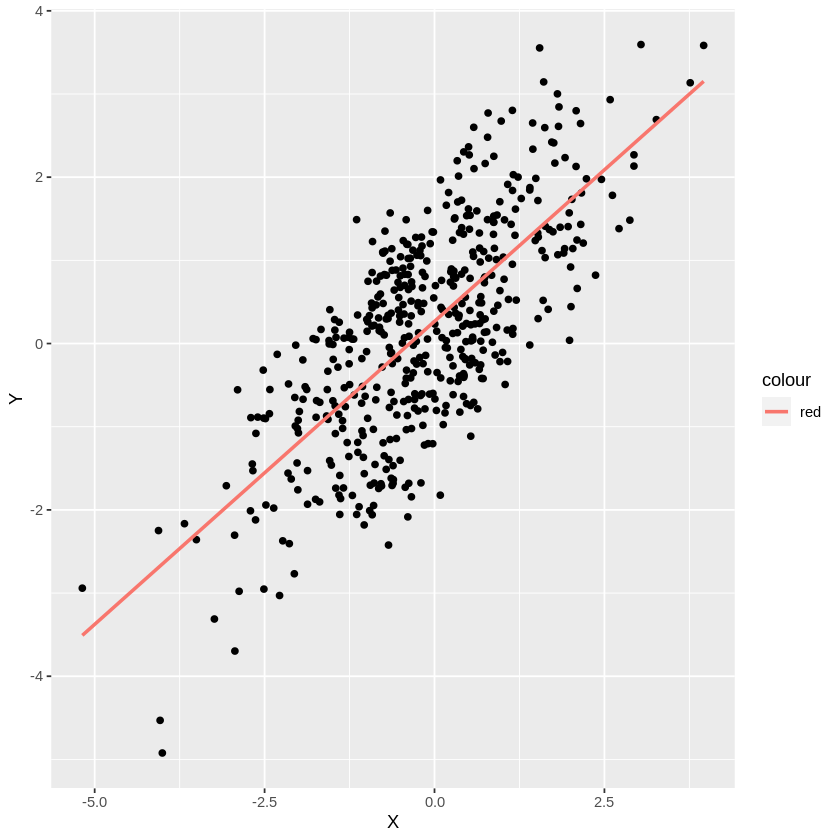

In [148]:
ggplot(data = df1)+
geom_point(mapping = aes(X, Y)) + 
geom_smooth(aes(X, Y, color = "red"), method = "lm", se = F)



**(2)** Create the scatterplot of `X` vs `Y` again. But this time, points corresponding to different value of `G` must be plotted in different colors. Superimpose on this scattetplot the lines of best fit for each group of points (with groups determined by the categorical variable `G`). Make sure _all_ the lines of best fit are in _red_ color. Also make sure to turn off any error bars. _**2 points**_

Warning message:
“Ignoring unknown aesthetics: line”
`geom_smooth()` using formula 'y ~ x'



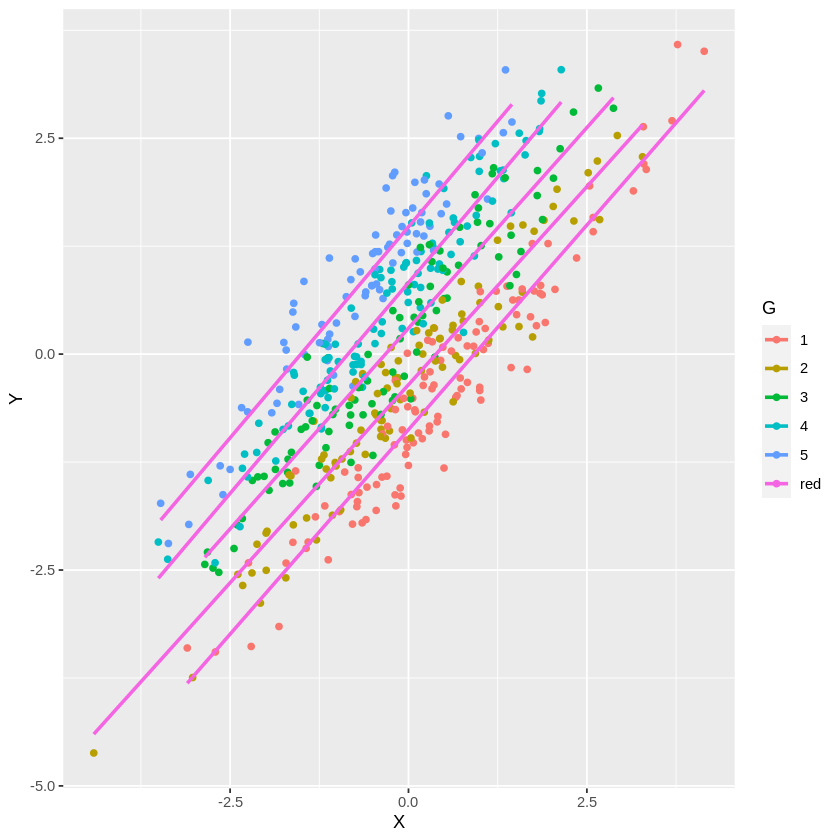

In [131]:
ggplot(data = df1)+
geom_point(mapping = aes(X, Y, color = G)) + 
geom_smooth(aes(X, Y, color = "red", line = G), method = "lm", se = F)

**(3)** Does the tibble `df1` exhibit the reversal paradox? Explain your answer. _**1 point**_

#### Text solution cell 4.3

No there is no reversal paradox becasue the correlation is positive for. both the overall scatterplot and the scatterplot when split into groups. 

**(4)** Let us create a tibble `df2` which has the same dimensions and variables as `df1`.

In [132]:
# DO NOT EDIT THIS CELL

df2 <- get_mystery_df(-0.7,1.5,0,1.5,0)

Repeat part **(1)** above but now for the tibble `df2` defined in the previous cell. _**1 point**_

`geom_smooth()` using formula 'y ~ x'



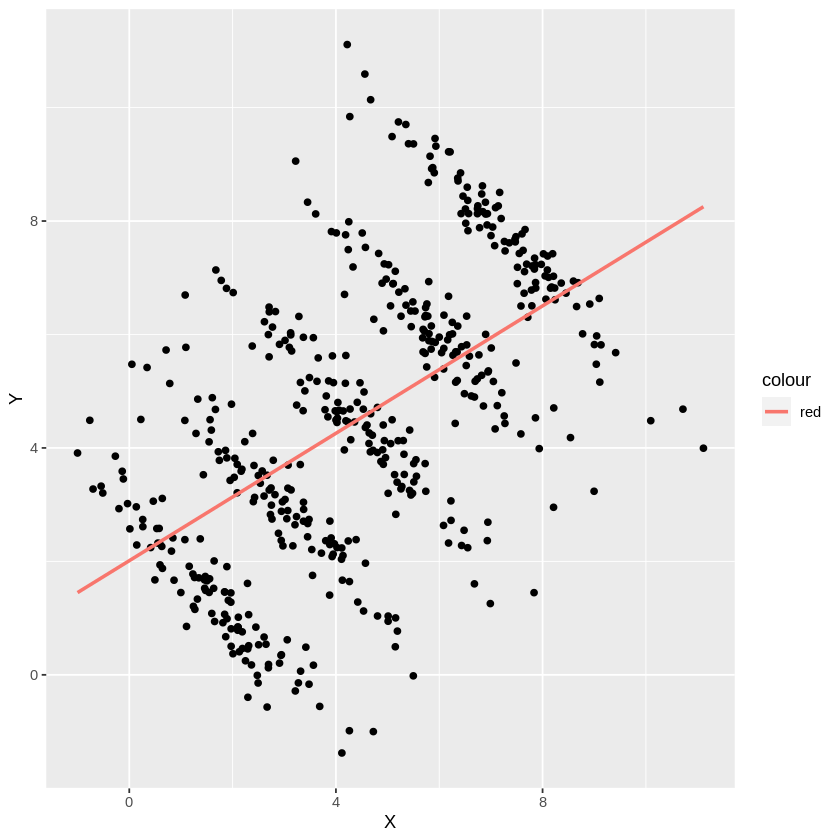

In [133]:
ggplot(data = df2)+
geom_point(mapping = aes(X, Y)) + 
geom_smooth(aes(X, Y, color = "red"), method = "lm", se = F)



**(5)** Repeat part **(2)** above but now for the tibble `df2`. _**1 point**_

Warning message:
“Ignoring unknown aesthetics: line”
`geom_smooth()` using formula 'y ~ x'



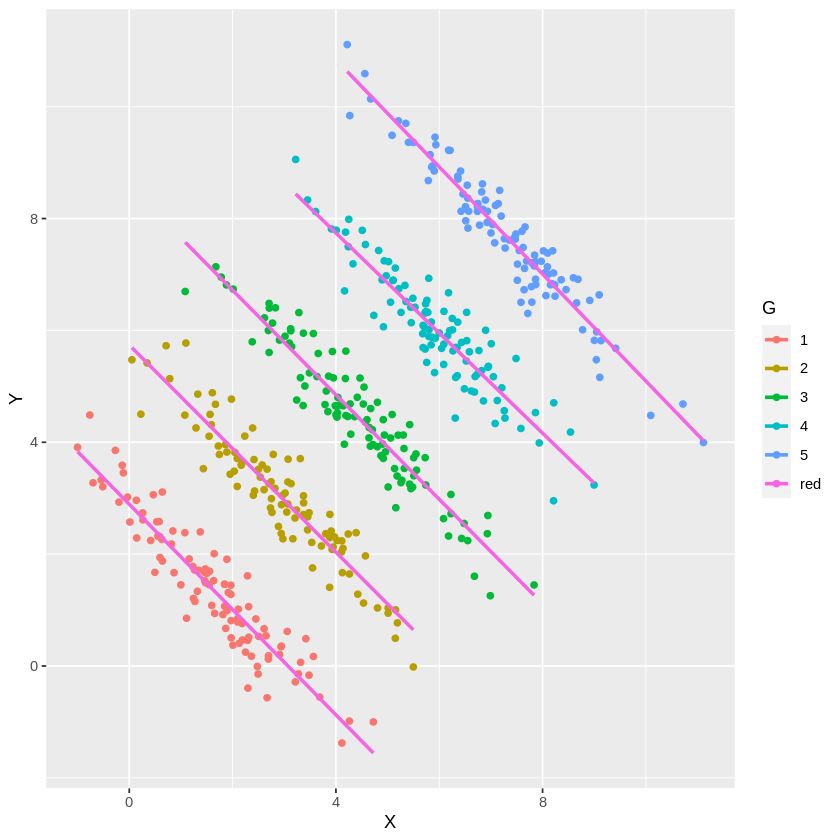

In [134]:
ggplot(data = df2)+
geom_point(mapping = aes(X, Y, color = G)) + 
geom_smooth(aes(X, Y, color = "red", line = G), method = "lm", se = F)



**(6)** Does the tibble `df2` exhibit the reversal paradox? Explain your answer. _**1 point**_

#### Text solution cell 4.6
Yes, there is a reversal paradox since the line of best fit is different for the general scatterplot and the scatterplot when split into group. It is positive for the general and negative for the grouped. 